<a href="https://colab.research.google.com/github/SravaniChowdaryy/Bangaluru-House-Price-Prediction-in-ML/blob/master/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SKILLVERTEX DATA SCIENCE INTERNSHIP 

EMPLOYEE  DATASET-PERFORMING EDA,DATA CLEANING(DATA PREPROCESSING),DATA VISUALIZATION,DECISION TREE ALGORITHM

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
data=pd.read_csv("train.csv")

In [ ]:
#Loads all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#Understanding the data
data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
data.shape

(54808, 14)

In [ ]:
data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
#Shows total number of uniques values 
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

# CLEANING THE DATA

In [ ]:
#Gives the sum of null values
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

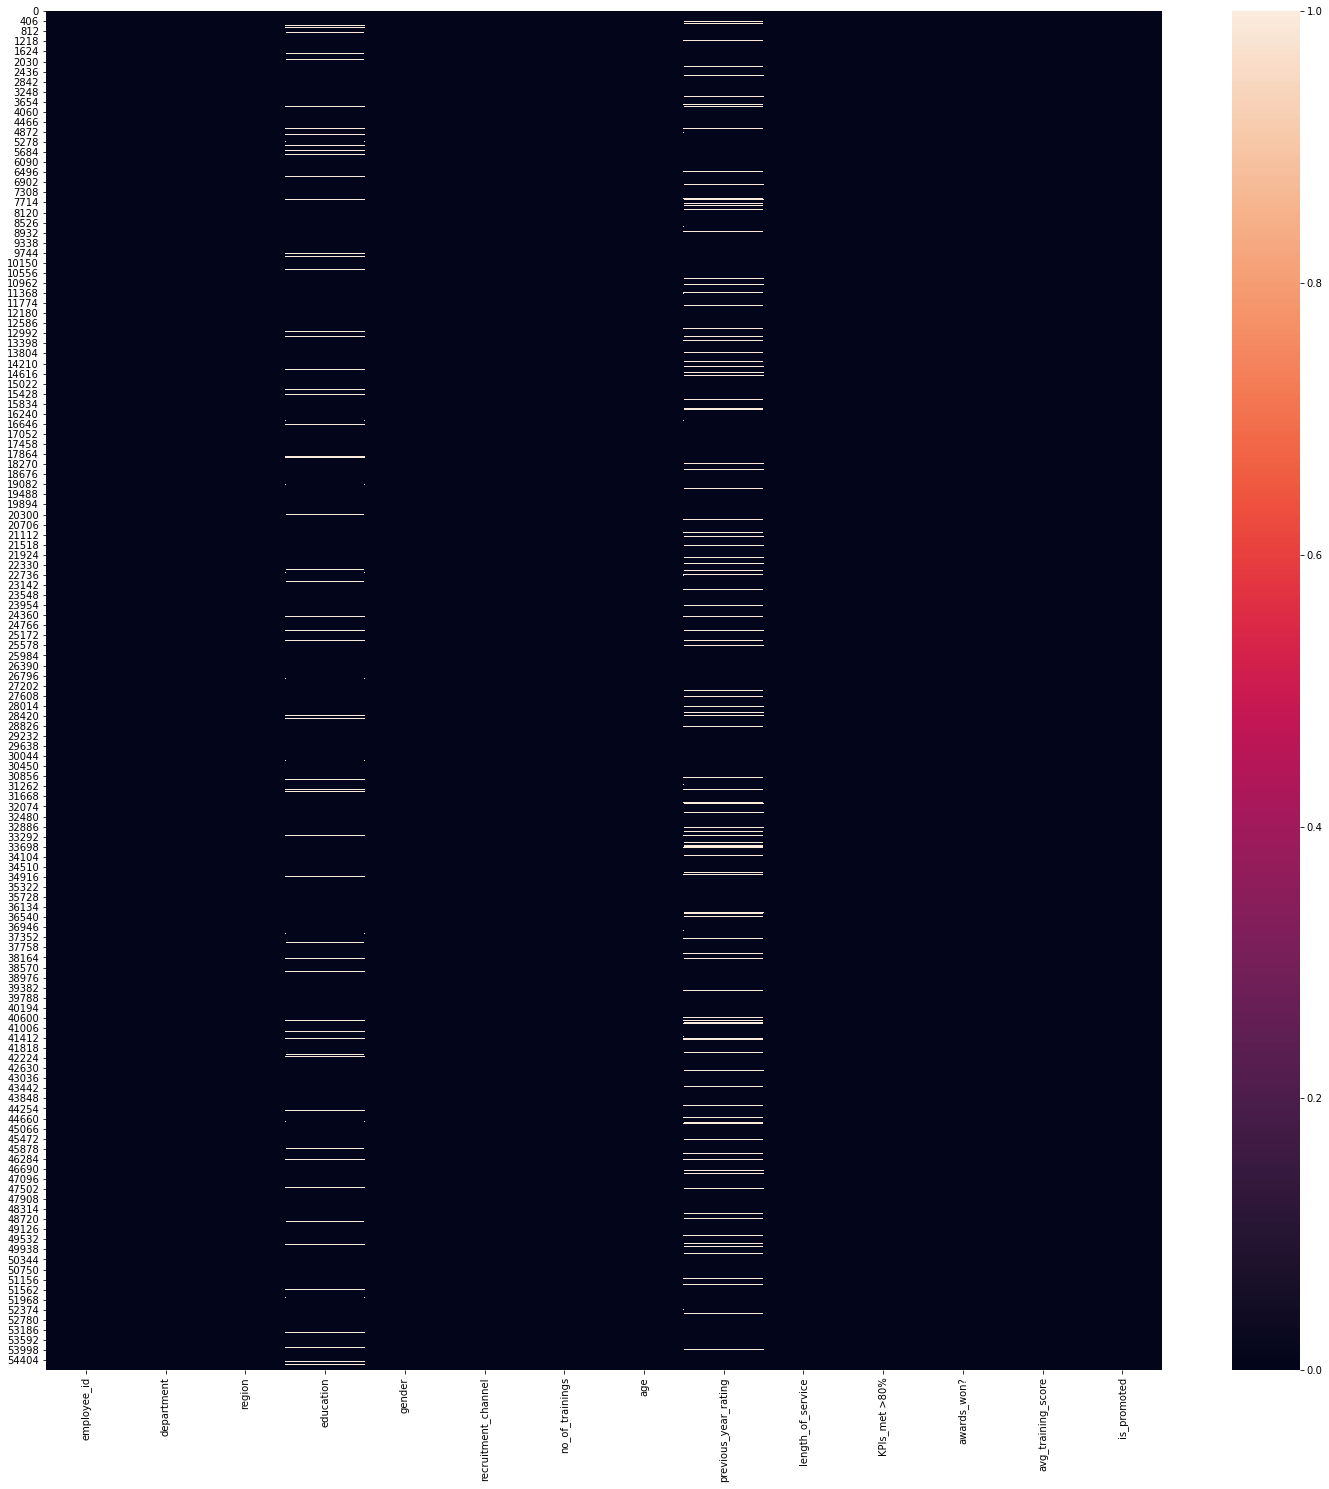

In [ ]:
#White spot in the figure represent presense of null values
plt.figure(figsize=(25,25))
sns.heatmap(data.isnull())

In [ ]:
#Prints percentage of null values in particular variable or column
#axis 0(zero)=gives rows
null_var=data.isnull().sum()/data.shape[0]*100
null_var

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

# NUMERIC DATASET - DATA CLEANING AND PREPROCESSING

In [ ]:
#Gives the variables which has numeric datavalues in it
data_num=data.select_dtypes(include=['int64','float64'])
data_num.head()

employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

<AxesSubplot:>

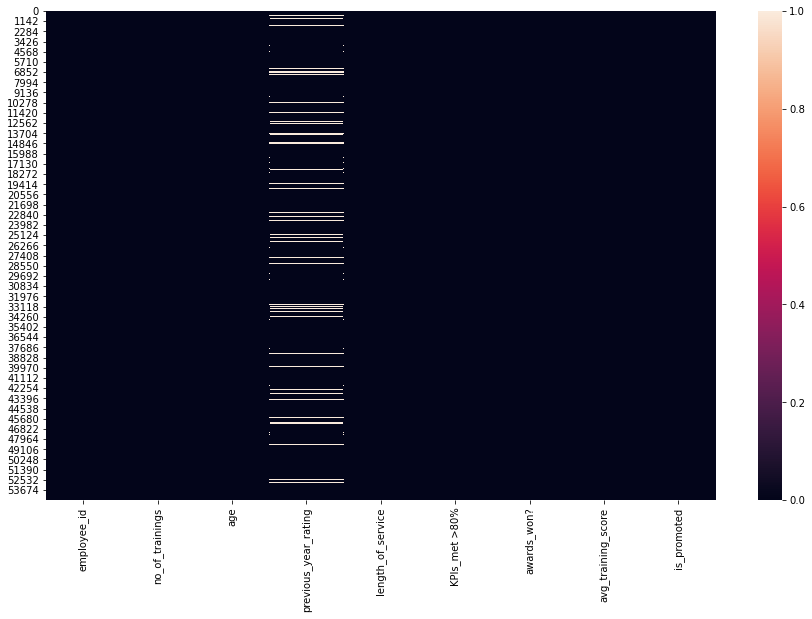

In [ ]:
#Checking presence of null values in numeric dataset
#White spot in the figure represent presense of null values
plt.figure(figsize=(15,9))
sns.heatmap(data_num.isnull())

In [ ]:
#Shows all the rows of numeric dataset which has mising value present in it
data_num[data_num.isnull().any(axis=1)]

employee_id  no_of_trainings  age  previous_year_rating  \
10           29934                1   30                   NaN   
23           71177                1   27                   NaN   
29           74759                1   26                   NaN   
56           45709                1   29                   NaN   
58           26599                2   27                   NaN   
62            9150                1   28                   NaN   
66           77981                1   27                   NaN   
67           16502                1   27                   NaN   
84           44575                1   29                   NaN   
89            9589                1   31                   NaN   
90           62658                1   20                   NaN   
96           64109                1   23                   NaN   
111          51444                1   30                   NaN   
123          41746                1   27                   NaN   
125           5461                1   28                   NaN   
127          66874                1   30                   NaN   
135           5102                1   24                   NaN   
141          50593                1   31                   NaN   
160          45157                1   27                   NaN   
178          28314                1   23                   NaN   
214          17833                1   28                   NaN   
220          43676                4   29                   NaN   
232          22300                1   28                   NaN   
242          42636                1   29                   NaN   
245          24414                1   25                   NaN   
255          15737                1   24                   NaN   
272          35873                1   28                   NaN   
313          11892                1   25                   NaN   
316          22511                1   28                   NaN   
334          74579                2   26                   NaN   
371           6587                1   29                   NaN   
374          56233                1   24                   NaN   
381           9192                1   28                   NaN   
386          36460                1   29                   NaN   
389          64798                3   30                   NaN   
427          22462                1   29                   NaN   
430          10002                1   24                   NaN   
436           5640                1   29                   NaN   
471          53981                1   31                   NaN   
475          36691                1   24                   NaN   
492          57033                1   25                   NaN   
508           6788                2   40                   NaN   
517          30155                2   28                   NaN   
518          59337                1   26                   NaN   
522            573                1   29                   NaN   
531          54550                1   28                   NaN   
532          31552                1   30                   NaN   
542          63667                1   28                   NaN   
553          18621                1   29                   NaN   
566           5272                1   24                   NaN   
567          49389                1   27                   NaN   
577          52241                1   24                   NaN   
586          22660                2   24                   NaN   
587          11943                1   30                   NaN   
591          44301                1   32                   NaN   
592          24875                1   26                   NaN   
602          20927                2   29                   NaN   
639          64764                1   26                   NaN   
656          22820                1   26                   NaN   
686           5303                1   26       

In [ ]:
#Gives the percentage of missing values in numeric dataset
missing_value_num_per=data_num.isnull().sum()/data_num.shape[0]*100

# lets calculate the total missing values in the data
data_num.isnull().sum()

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([data_num.isnull().sum(), missing_value_num_per], axis=1, keys=['Total Missing Values', 'Percent %'])

# lets check the head of the data
missing_data

Total Missing Values  Percent %
employee_id                              0   0.000000
no_of_trainings                          0   0.000000
age                                      0   0.000000
previous_year_rating                  4124   7.524449
length_of_service                        0   0.000000
KPIs_met >80%                            0   0.000000
awards_won?                              0   0.000000
avg_training_score                       0   0.000000
is_promoted                              0   0.000000

In [ ]:
#Gives the List of variable names which has null values present in it
missing_num_var=[var for var in data_num.columns if data_num[var].isnull().sum()>0]
missing_num_var

['previous_year_rating']

In [ ]:
#Prints the number of variables present in the List
print(len(missing_num_var))

1


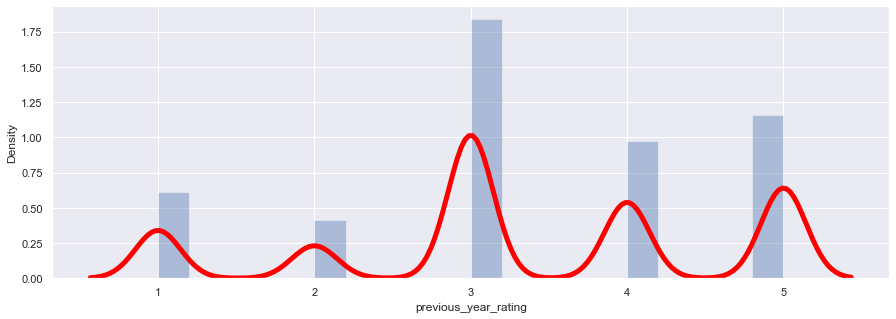

In [ ]:
#Data Distribution of all numeric columns
plt.figure(figsize=(15,5))
sns.set()
#enumerate function gives an item from list with its index
for i,var in enumerate(missing_num_var):
    #There are 1 columns so 1 multiplied to 1 is equal to 1
    plt.subplot(1,1,i+1)
    sns.distplot(data_num[var],bins=20,kde_kws={'linewidth':5,'color':'red'})
    

IF DATA DISTRIBUTION PLOT GIVES A SHAPE WHICH IS SYMMETRICAL(WHEN WE CUT IT WE GET MIRROR IMAGE),THEN WE CAN FILL ITS
MISSING VALUES WITH MEAN,MEDIAN,MODE

ASSYMMETRIC=MEDIAN

WE USE MEAN AND MEDIAN WHEN MISSING VALUES IN DATASET IS RANDOM

In [ ]:
#Filling missing values with mean
data_num_mean=data_num.fillna(data_num.mean())
data_num_mean.isnull().sum().sum()

0

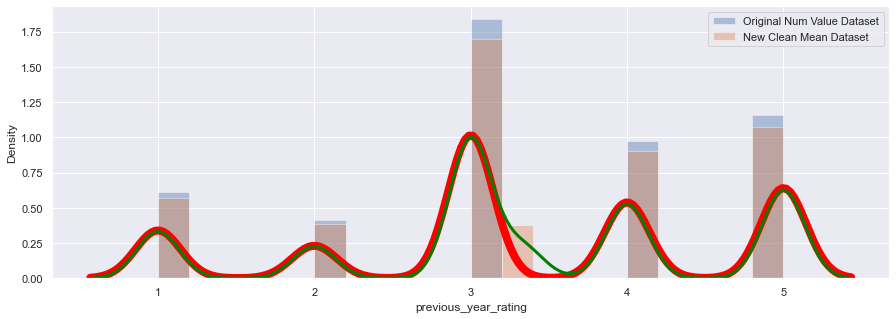

In [ ]:
import seaborn as sns
#Data Distribution of all original numeric columns and new clean mean dataset
plt.figure(figsize=(15,5))
sns.set()
#enumerate function gives an item from list with its index
for i,var in enumerate(missing_num_var):
    #There are 1 columns so 1 multiplied to 1 is equal to 1
    plt.subplot(1,1,i+1)
    sns.distplot(data_num[var],bins=20,kde_kws={'linewidth':8,'color':'red'},label="Original Num Value Dataset")
    sns.distplot(data_num_mean[var],bins=20,kde_kws={'linewidth':3,'color':'green'},label="New Clean Mean Dataset")
    plt.legend()

In [ ]:
#Filling missing values with median
data_num_median=data_num.fillna(data_num.median())
data_num_median.isnull().sum().sum()

0

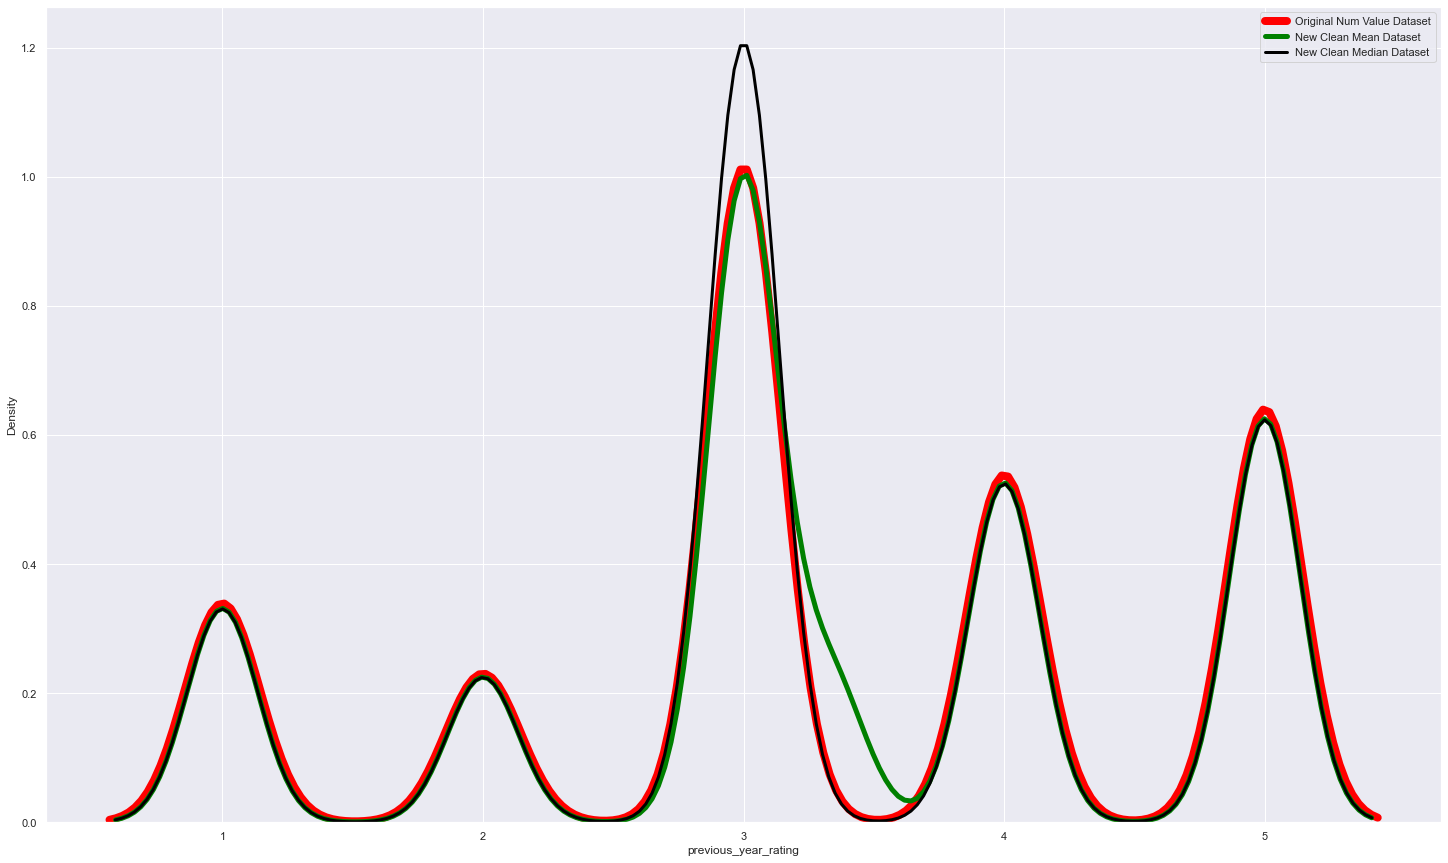

In [ ]:
#Data Distribution of all original numeric columns and new clean mean datadet and new clean median dataset
plt.figure(figsize=(25,15))
sns.set()
#enumerate function gives an item from list with its index
for i,var in enumerate(missing_num_var):
    #There are 1 columns so 1 multiplied to 1 is equal to 1
    plt.subplot(1,1,i+1)
    sns.distplot(data_num[var],bins=20,hist=False,kde_kws={'linewidth':8,'color':'red'},label="Original Num Value Dataset")
    sns.distplot(data_num_mean[var],bins=20,hist=False,kde_kws={'linewidth':5,'color':'green'},label="New Clean Mean Dataset")
    sns.distplot(data_num_median[var],bins=20,hist=False,kde_kws={'linewidth':3,'color':'black'},label="New Clean Median Dataset")
    plt.legend()

# OUTLIER

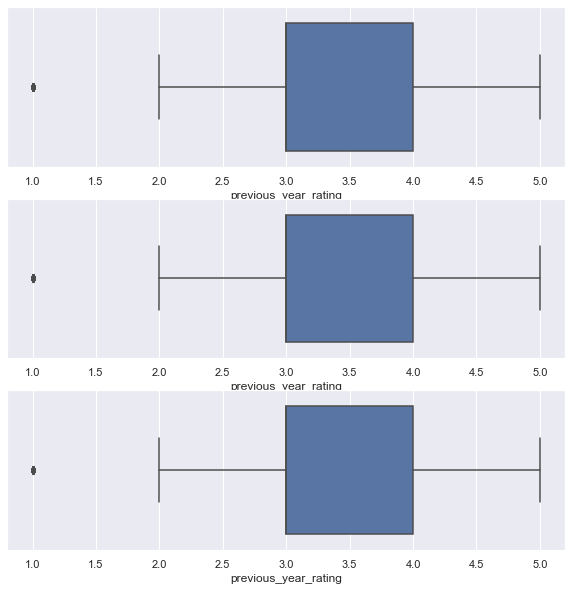

In [ ]:
#Checking presence of outlier in dataset using boxplot
for i,var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(data_num[var])
    plt.subplot(3,1,2)
    sns.boxplot(data_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(data_num_median[var])

In [ ]:
data_concat=pd.concat([data_num[missing_num_var],data_num_mean[missing_num_var],data_num_median[missing_num_var]],axis=1,keys=
                ['Original','Mean','Median'])
#Shows all Rows which has null values in it
#axis=1 shows all rows 
data_concat[data_concat.isnull().any(axis=1)]

Original                 Mean               Median
      previous_year_rating previous_year_rating previous_year_rating
10                     NaN             3.329256                  3.0
23                     NaN             3.329256                  3.0
29                     NaN             3.329256                  3.0
56                     NaN             3.329256                  3.0
58                     NaN             3.329256                  3.0
62                     NaN             3.329256                  3.0
66                     NaN             3.329256                  3.0
67                     NaN             3.329256                  3.0
84                     NaN             3.329256                  3.0
89                     NaN             3.329256                  3.0
90                     NaN             3.329256                  3.0
96                     NaN             3.329256                  3.0
111                    NaN             3.329256                  3.0
123                    NaN             3.329256                  3.0
125                    NaN             3.329256                  3.0
127                    NaN             3.329256                  3.0
135                    NaN             3.329256                  3.0
141                    NaN             3.329256                  3.0
160                    NaN             3.329256                  3.0
178                    NaN             3.329256                  3.0
214                    NaN             3.329256                  3.0
220                    NaN             3.329256                  3.0
232                    NaN             3.329256                  3.0
242                    NaN             3.329256                  3.0
245                    NaN             3.329256                  3.0
255                    NaN             3.329256                  3.0
272                    NaN             3.329256                  3.0
313                    NaN             3.329256                  3.0
316                    NaN             3.329256                  3.0
334                    NaN             3.329256                  3.0
371                    NaN             3.329256                  3.0
374                    NaN             3.329256                  3.0
381                    NaN             3.329256                  3.0
386                    NaN             3.329256                  3.0
389                    NaN             3.329256                  3.0
427                    NaN             3.329256                  3.0
430                    NaN             3.329256                  3.0
436                    NaN             3.329256                  3.0
471                    NaN             3.329256                  3.0
475                    NaN             3.329256                  3.0
492                    NaN             3.329256                  3.0
508                    NaN             3.329256                  3.0
517                    NaN             3.329256                  3.0
518                    NaN             3.329256                  3.0
522                    NaN             3.329256                  3.0
531                    NaN             3.329256                  3.0
532                    NaN             3.329256                  3.0
542                    NaN             3.329256                  3.0
553                    NaN             3.329256                  3.0
566                    NaN             3.329256                  3.0
567                    NaN             3.329256                  3.0
577                    NaN             3.329256                  3.0
586                    NaN             3.329256                  3.0
587                    NaN             3.329256                  3.0
591                    NaN             3.329256                  3.0
592                    NaN             3.329256                  3.0
602             

# CATEGORICAL DATASET-DATA CLEANING AND PREPROCESSING

In [ ]:
#Gives the variables which has categorical datavalues in it
data_cat=data.select_dtypes(include=['object'])
data_cat.head()

department     region         education gender recruitment_channel
0  Sales & Marketing   region_7  Master's & above      f            sourcing
1         Operations  region_22        Bachelor's      m               other
2  Sales & Marketing  region_19        Bachelor's      m            sourcing
3  Sales & Marketing  region_23        Bachelor's      m               other
4         Technology  region_26        Bachelor's      m               other

In [ ]:
#Gives missing percentage in categorical dataset
missing_value_cat_per=data_cat.isnull().mean()*100
missing_value_cat_per

department             0.000000
region                 0.000000
education              4.395344
gender                 0.000000
recruitment_channel    0.000000
dtype: float64

In [ ]:
#Gives the names of variables which has missing values in it
isnull_per=data_cat.isnull().mean()*100
miss_vars=isnull_per[isnull_per>0].keys()
miss_vars

Index(['education'], dtype='object')

In [ ]:
#Fills the null values in education column by putting missing term
data_cat['education'].fillna("missing")

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
5              Bachelor's
6              Bachelor's
7        Master's & above
8              Bachelor's
9        Master's & above
10                missing
11             Bachelor's
12             Bachelor's
13       Master's & above
14       Master's & above
15             Bachelor's
16             Bachelor's
17             Bachelor's
18             Bachelor's
19             Bachelor's
20             Bachelor's
21                missing
22             Bachelor's
23             Bachelor's
24       Master's & above
25             Bachelor's
26             Bachelor's
27             Bachelor's
28             Bachelor's
29             Bachelor's
30             Bachelor's
31             Bachelor's
32                missing
33             Bachelor's
34             Bachelor's
35             Bachelor's
36             Bachelor's
37             Bachelor's
38       Mas

In [ ]:
#Gives the mode value
data_cat['education'].mode()

0    Bachelor's
dtype: object

In [ ]:
#Gives counts
data_cat['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
#Fills the null values with mode value 
data_cat['education'].fillna(data_cat['education'].mode()[0])

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
5              Bachelor's
6              Bachelor's
7        Master's & above
8              Bachelor's
9        Master's & above
10             Bachelor's
11             Bachelor's
12             Bachelor's
13       Master's & above
14       Master's & above
15             Bachelor's
16             Bachelor's
17             Bachelor's
18             Bachelor's
19             Bachelor's
20             Bachelor's
21             Bachelor's
22             Bachelor's
23             Bachelor's
24       Master's & above
25             Bachelor's
26             Bachelor's
27             Bachelor's
28             Bachelor's
29             Bachelor's
30             Bachelor's
31             Bachelor's
32             Bachelor's
33             Bachelor's
34             Bachelor's
35             Bachelor's
36             Bachelor's
37             Bachelor's
38       Mas

In [ ]:
#Fills the null values with mode and gives the name of the mode
for var in miss_vars:
    data_cat[var].fillna(data_cat[var].mode()[0],inplace=True)
    print(var,"=",data_cat[var].mode()[0])

education = Bachelor's


In [ ]:
#Gives the count of null values
data_cat.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

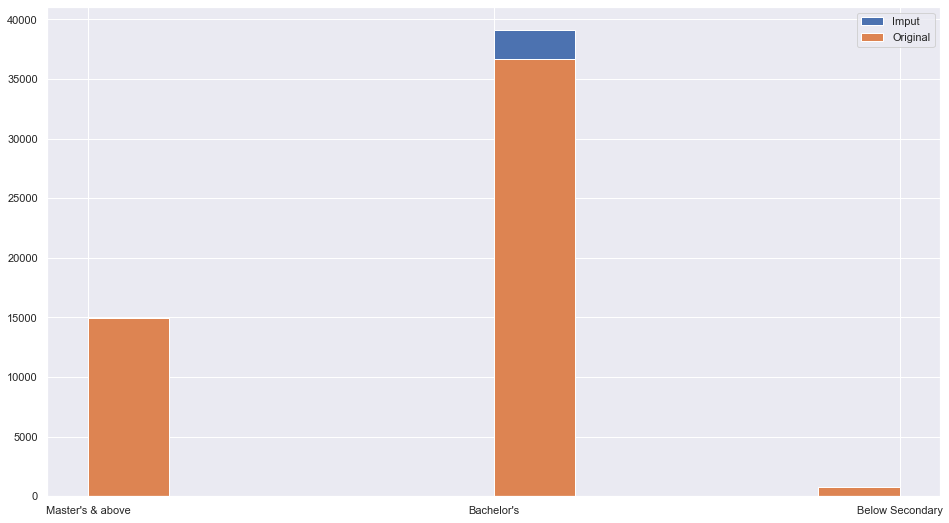

In [ ]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_vars):
    #There is only variable so 1 multiplied to 1 = 1
    plt.subplot(1,1,i+1)
    plt.hist(data_cat[var],label='Imput')
    #Removes null values and plot the histogram 
    plt.hist(data[var].dropna(),label='Original')
    #It shows label
    plt.legend()

In [ ]:
#Updates the original dataset with the new dataset
data.update(data_cat)
data.update(data_num_median)

In [ ]:
#Checks whether the dataset is updated or not
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

THERE IS NO NULL VALUE PRESENT IN THE DATASET

In [ ]:
#Label Encoding five categorical variables

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['education_enc']=le.fit_transform(data['education'])
data['department_enc']=le.fit_transform(data['department'])
data['region_enc']=le.fit_transform(data['region'])
data['gender_enc']=le.fit_transform(data['gender'])
data['recruitment_channel_enc']=le.fit_transform(data['recruitment_channel'])
data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  education_enc  department_enc  region_enc  gender_enc  \
0            0              2               7          31           0   
1            0              0               4          14           1   
2            0              0               7          10           1   
3            0              0               7          15           1   
4            0              0               8          18           1   

   recruitment_channel_enc  
0                        2  
1                        0  
2                        2  
3                        0  
4                        0

# Q1. Does Older Employees getting more Promotion than Younger Employees?

<AxesSubplot:xlabel='age', ylabel='is_promoted'>

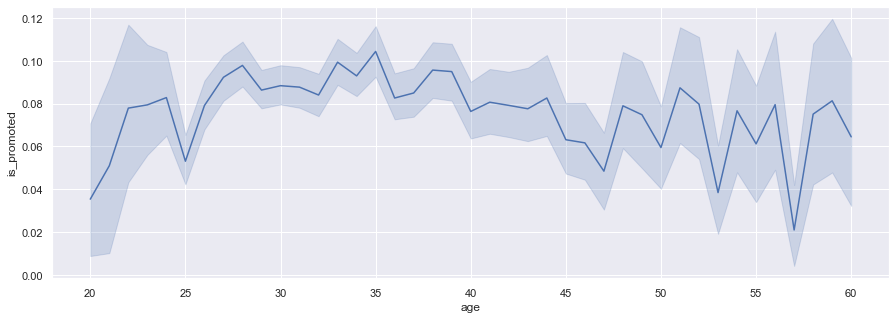

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data['age'], data['is_promoted'], palette = 'winter')

# Q2. What is the Probability to get Promoted, If an employeed has won an award?

<AxesSubplot:xlabel='awards_won?', ylabel='is_promoted'>

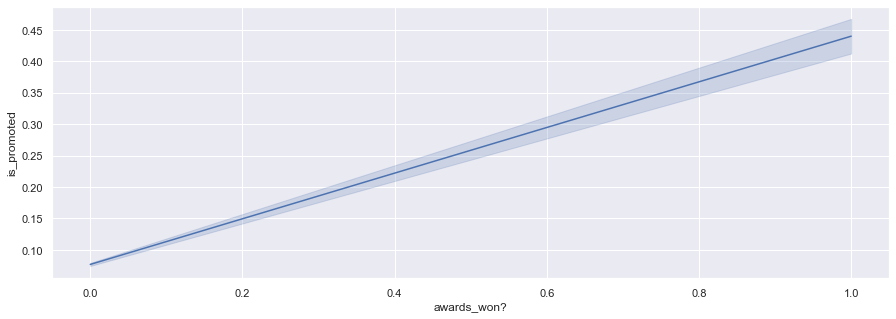

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data['awards_won?'], data['is_promoted'], palette = 'winter')

# Q3. What is the Average Training Score of those Employees who got Promotion?

<AxesSubplot:xlabel='avg_training_score', ylabel='is_promoted'>

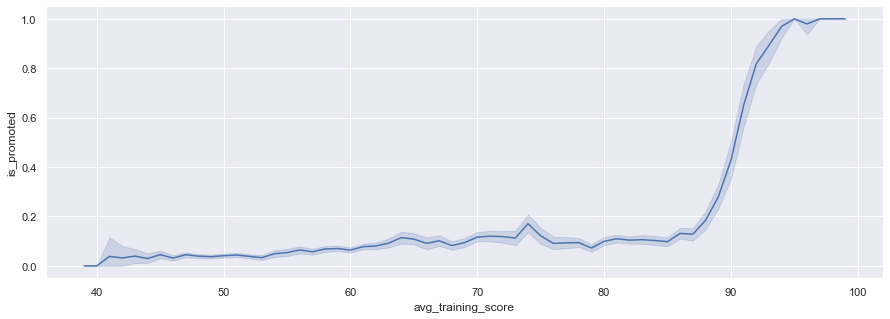

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data['avg_training_score'], data['is_promoted'], palette = 'winter')

# Q4. What is the Impact of Gender in Promotions?

<AxesSubplot:xlabel='gender', ylabel='is_promoted'>

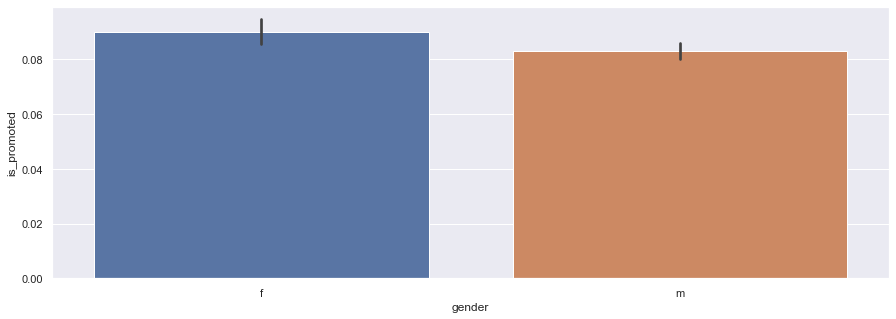

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data['gender'], data['is_promoted'])

# Q5. What is the Probability of Freshers getting Promoted?

<AxesSubplot:xlabel='length_of_service', ylabel='is_promoted'>

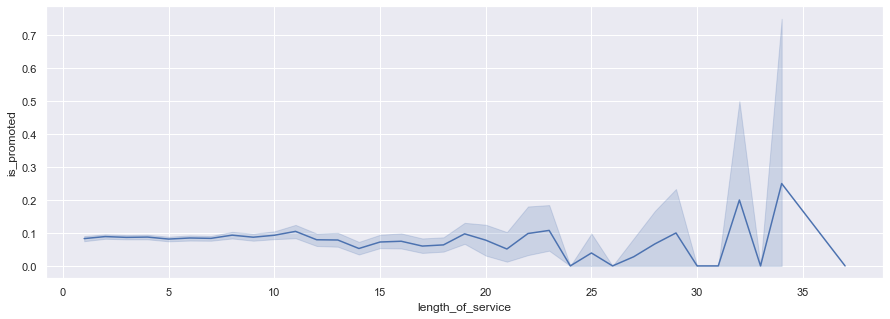

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data['length_of_service'], data['is_promoted'], palette = 'winter')

# MULTIVARIATE ANALYSIS

<AxesSubplot:>

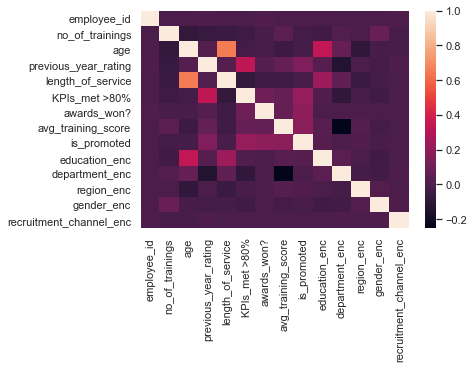

In [ ]:
sns.heatmap(data.corr())

# DECISION TREE ALGORITHM

In [ ]:
import sklearn
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
#Seperating the target variable
X=data[['no_of_trainings', 'length_of_service', 'avg_training_score', 'is_promoted']].values
Y=data['department']
#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100 )
#Function to perform training and Entropy
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
#Function to predict
y_pred_en=clf_entropy.predict(X_test)
print(y_pred_en)

['Sales & Marketing' 'Technology' 'Analytics' ... 'Sales & Marketing'
 'Analytics' 'Operations']


In [ ]:
#Checking accuracy
print("Acurracy is = ",accuracy_score(y_test,y_pred_en)*100)

Acurracy is =  77.46761539864988
